# Predicting the student percentage based on their study hours

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [2]:
Data = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
Data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


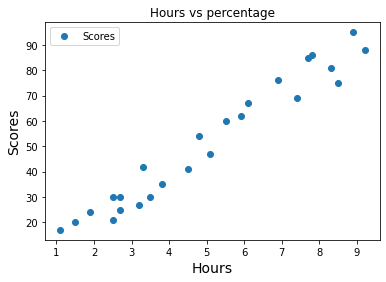

In [8]:
#plotting the distribution 
Data.plot(x = 'Hours', y = 'Scores', style = 'o')
plt.title('Hours vs percentage')
plt.xlabel('Hours', fontsize = 14)
plt.ylabel('Scores', fontsize = 14);

### Preparing the data

In [15]:
X = Data.iloc[:, :-1].values  
y = Data.iloc[:, 1].values  

### Splitting the data

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

### Fitting the model

In [17]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

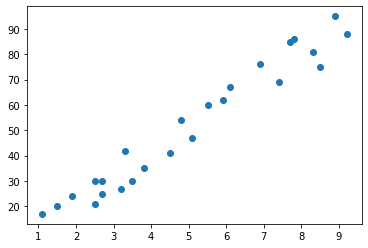

array([92.38611528])

In [23]:
#plotting the regressor line
line = regressor.coef_*9.25+regressor.intercept_
plt.scatter(X,y)
plt.show()
line

In [26]:
#predicting 
y_preds = regressor.predict(X_test)
y_preds

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

In [27]:
#Comparing the actual data and the predicted data
Df = pd.DataFrame({'Actual': y_test, 'Predicted': y_preds})
Df.head()

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [28]:
#Evaluating the model
from sklearn import metrics
metrics.mean_absolute_error(y_test, y_preds)

3.9207511902099244